### PRACTICA MACHINE LEARNING 

1. Importación de paquetes.

In [96]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import bootcampviztools as bt 

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc, log_loss, cohen_kappa_score


2. Importación de los datos.

In [97]:
df_wines = pd.read_csv("./data/wines_dataset.csv", sep = "|")


In [98]:
df_wines.info()
df_wines.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.210,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.160,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.180,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.260,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.630,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
5,5.7,0.265,0.28,6.90,0.036,46.0,150.0,0.99299,3.36,0.44,10.8,7,white
6,6.6,0.210,0.31,11.40,0.039,46.0,165.0,0.99795,3.41,0.44,9.8,7,white
7,6.7,0.310,0.30,2.10,0.038,18.0,130.0,0.99280,3.36,0.63,10.6,6,white
8,8.9,0.750,0.14,2.50,0.086,9.0,30.0,0.99824,3.34,0.64,10.5,5,red
9,7.5,0.420,0.20,1.40,0.060,15.0,168.0,0.99440,3.06,0.40,9.4,6,white


In [99]:
df_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [100]:
df_wines["class"].value_counts()

class
white    4898
red      1599
Name: count, dtype: int64

3. Selección de target

Vamos a querer deducir la clase de vino que saldrá (tinto a blanco) 

In [101]:
#Selección de target. 

target = "class" #Si queremos saber que tipo de vino será, por lo tanto esta será nuestra feature objetivo.

C:\Users\shark\AppData\Local\Temp\ipykernel_3880\172518310.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_wines, x= target, palette= "viridis");


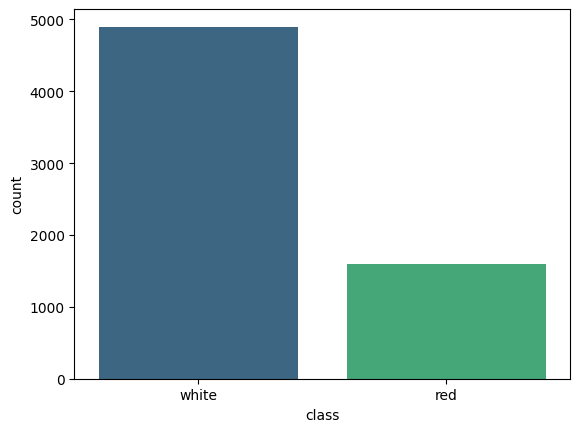

In [102]:
sns.countplot(df_wines, x= target, palette= "viridis");

*Queda claro que el target está desbalanceado.*

In [103]:
#Vamos a tratarla tambien para que no de problemas. 

df_wines[target] = df_wines[target].replace({"red": 0, "white": 1})

C:\Users\shark\AppData\Local\Temp\ipykernel_3880\2700470308.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_wines[target] = df_wines[target].replace({"red": 0, "white": 1})


4. Separación train / test

In [104]:
#Separamos el dataset de manera standar.

train_set, test_set = train_test_split(df_wines, test_size= 0.2, random_state= 42)

5. Mini-EDA

In [105]:
train_set


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
1916,7.9,0.18,0.40,2.20,0.049,38.0,67.0,0.99600,3.33,0.93,11.3,5,0
947,7.1,0.18,0.74,15.60,0.044,44.0,176.0,0.99960,3.38,0.67,9.0,6,1
877,7.6,0.51,0.24,1.20,0.040,10.0,104.0,0.99200,3.05,0.29,10.8,6,1
2927,6.0,0.25,0.28,7.70,0.053,37.0,132.0,0.99489,3.06,0.50,9.4,6,1
6063,9.0,0.38,0.41,2.40,0.103,6.0,10.0,0.99604,3.13,0.58,11.9,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6.4,0.24,0.50,11.60,0.047,60.0,211.0,0.99660,3.18,0.57,9.3,5,1
5191,6.6,0.22,0.28,12.05,0.058,25.0,125.0,0.99856,3.45,0.45,9.4,5,1
5226,6.6,0.20,0.38,7.90,0.052,30.0,145.0,0.99470,3.32,0.56,11.0,7,1
5390,7.3,0.41,0.29,1.80,0.032,26.0,74.0,0.98889,2.96,0.35,13.0,8,1


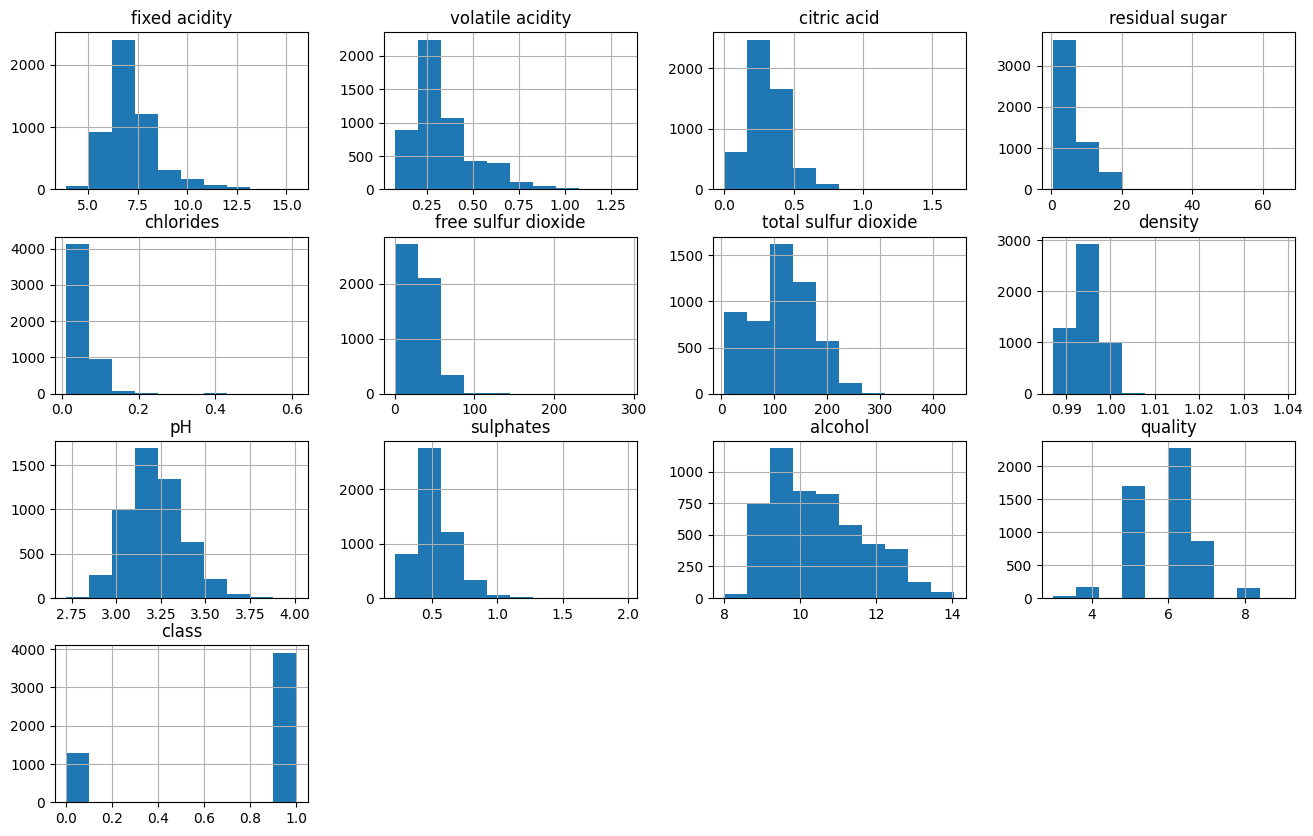

In [106]:
train_set.hist(figsize= (16,10));

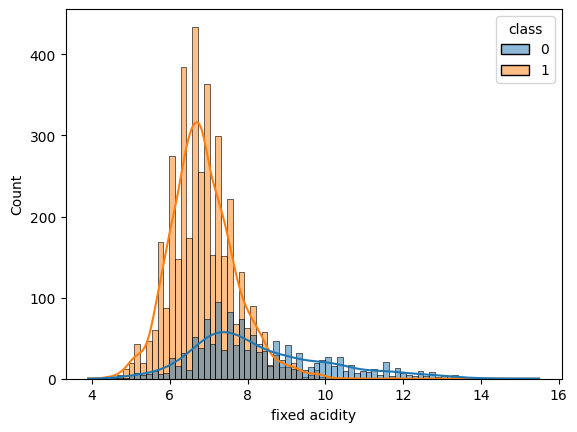

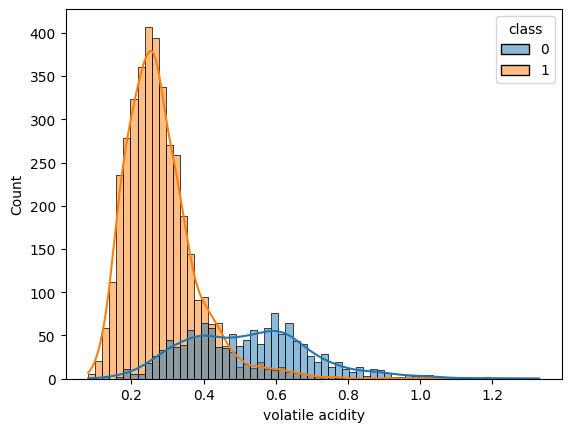

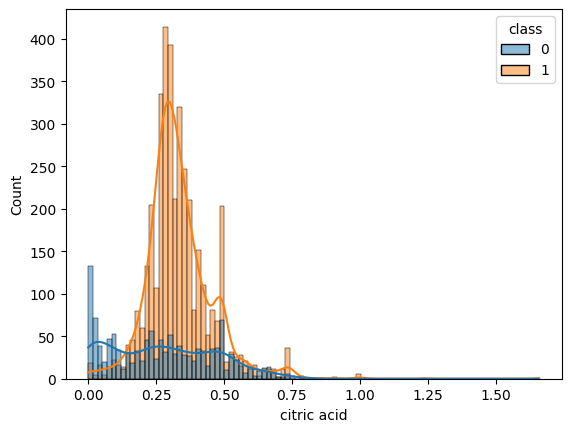

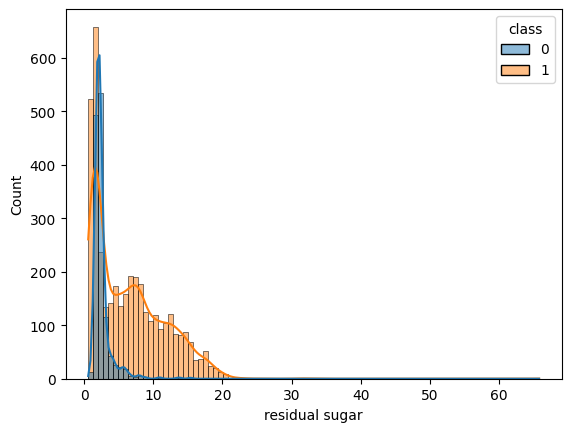

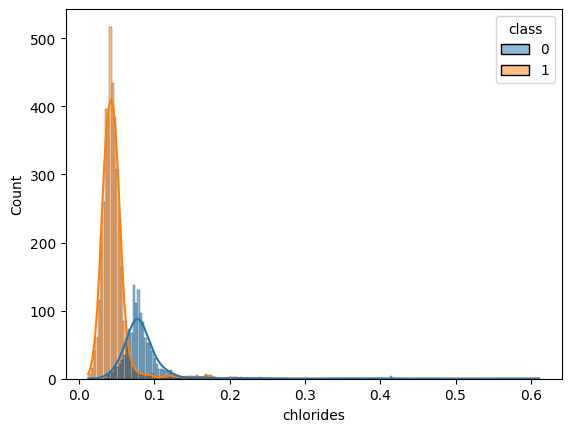

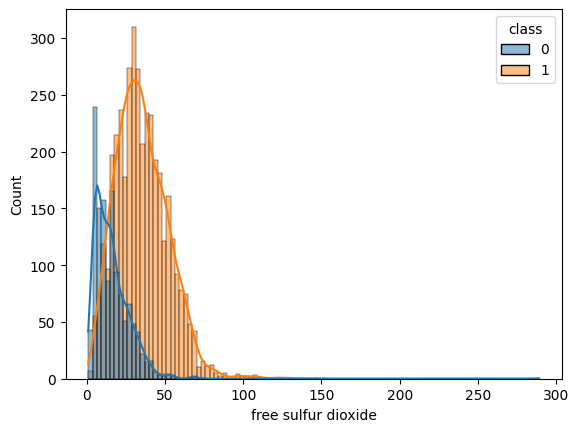

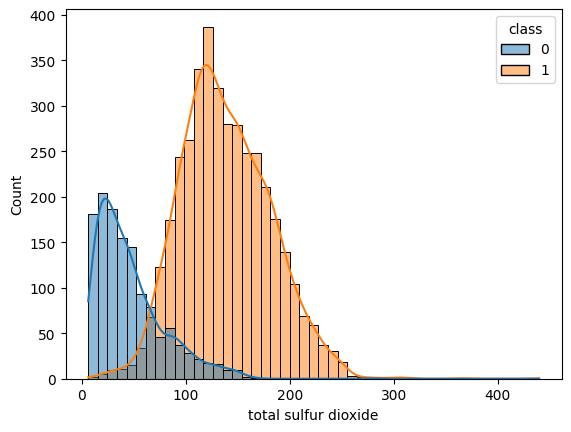

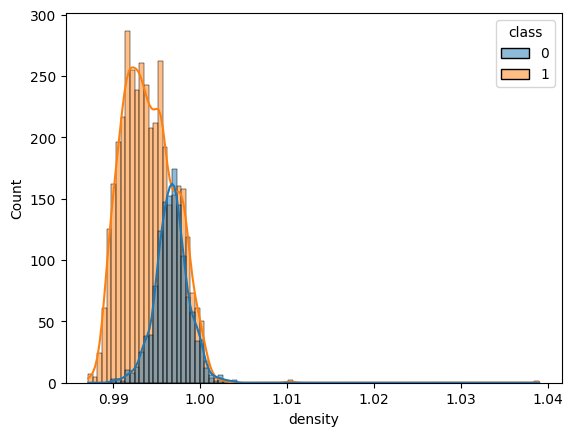

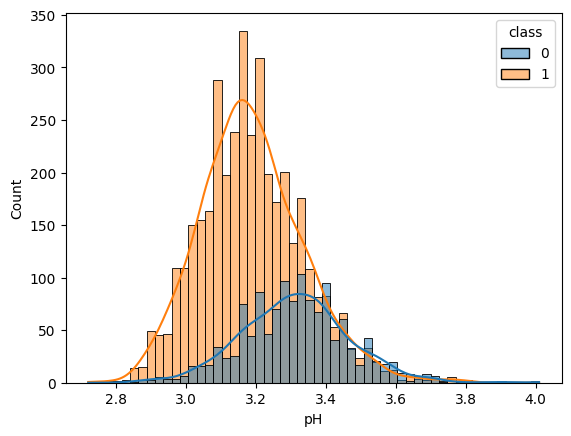

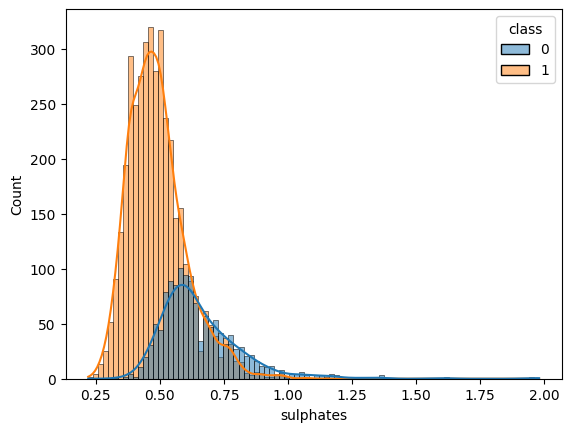

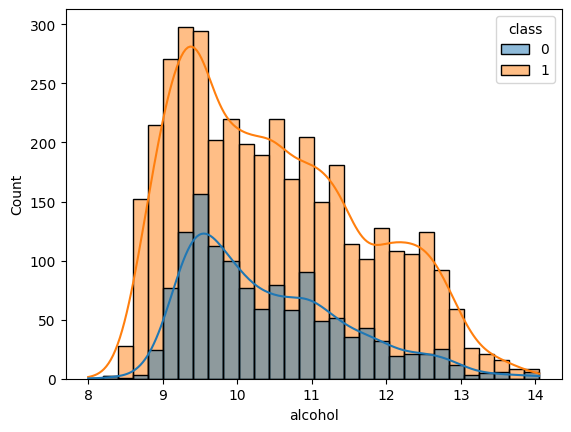

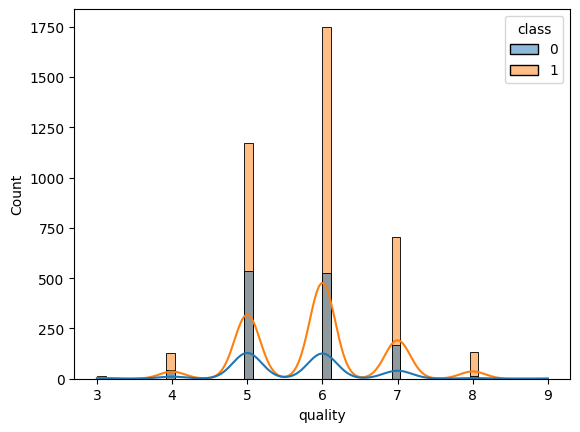

In [107]:
#Veamos la distribución de las features 

features_num = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]

for i in features_num:
    sns.histplot(train_set, x= i,hue= target, kde= True)
    plt.show()

In [108]:
corr = train_set.corr(numeric_only= True)
correlacion_abs = np.abs(corr[target].sort_values(ascending = False))
correlacion_abs

class                   1.000000
total sulfur dioxide    0.701692
free sulfur dioxide     0.468220
residual sugar          0.353771
citric acid             0.189034
quality                 0.111889
alcohol                 0.026966
pH                      0.338300
density                 0.384596
fixed acidity           0.489122
sulphates               0.493462
chlorides               0.523182
volatile acidity        0.652963
Name: class, dtype: float64

<Axes: >

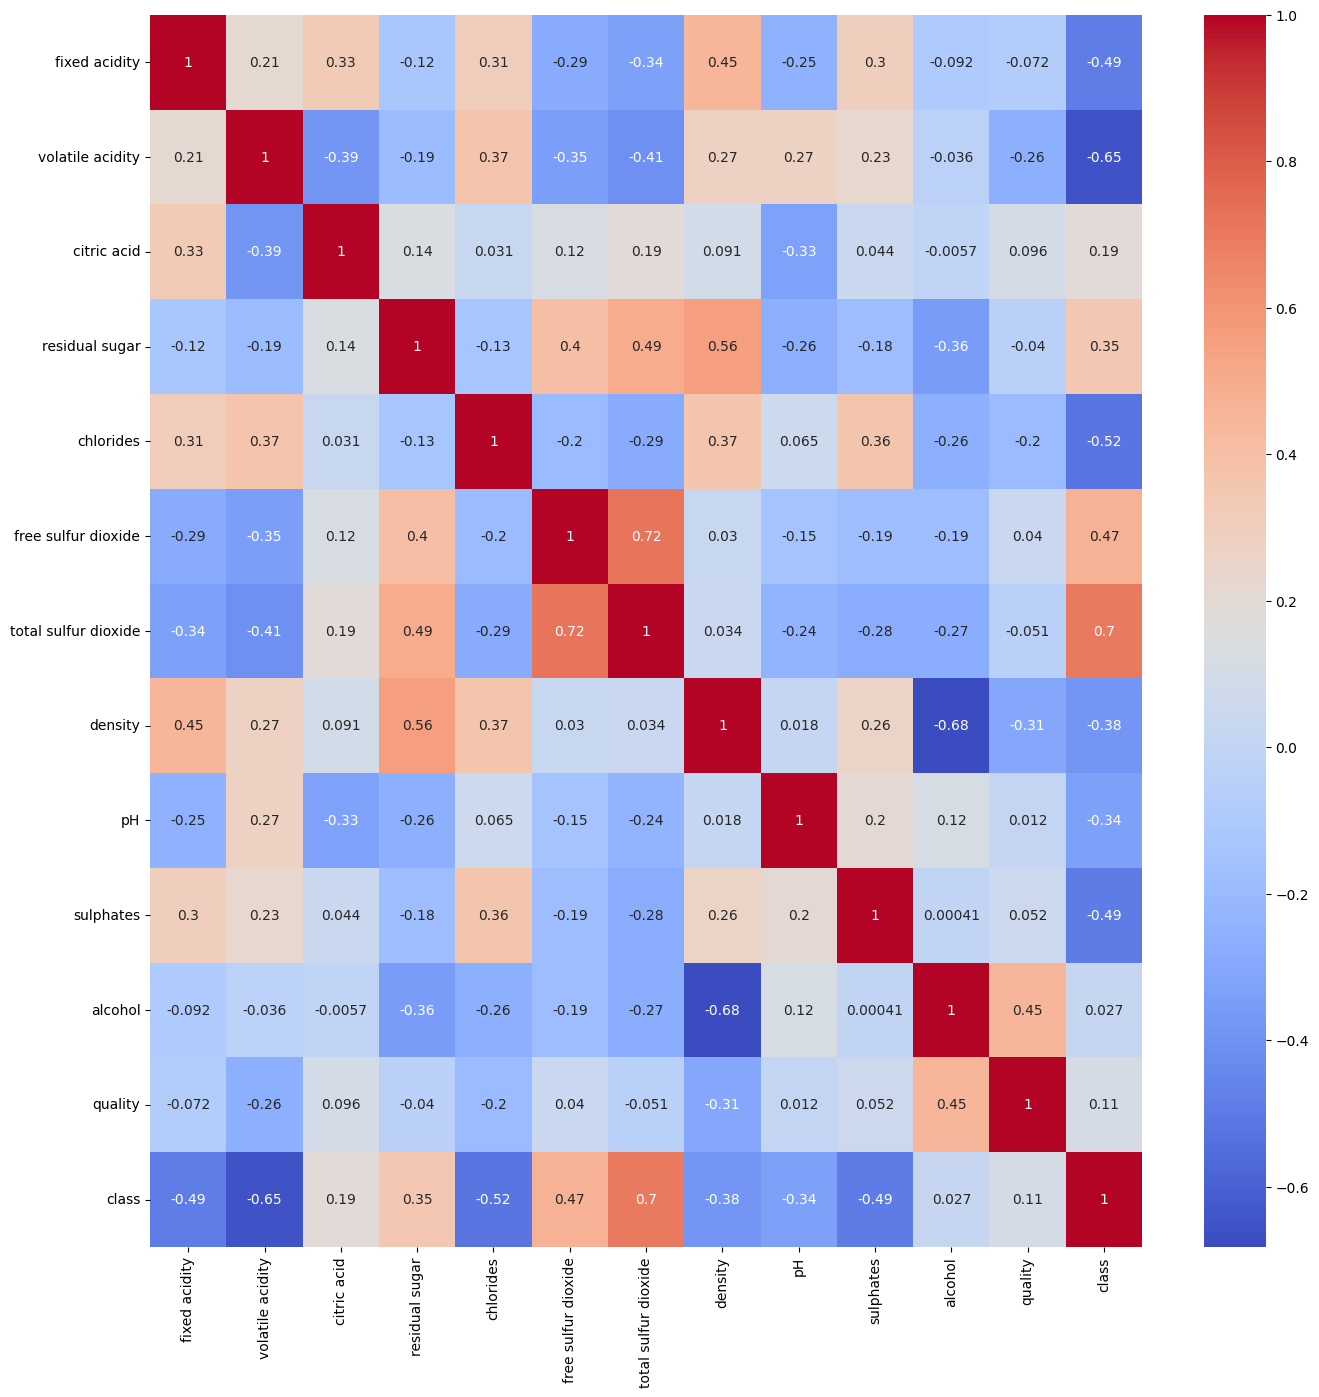

In [109]:
#Veamos su correlación. 

plt.figure(figsize= (16,16))
sns.heatmap(corr, cmap= "coolwarm", annot= True)

Selección de Features

In [110]:
criterio = 0.2

features_num = correlacion_abs[correlacion_abs > criterio].index.to_list()
features_num.remove(target)

In [111]:
features_num

['total sulfur dioxide',
 'free sulfur dioxide',
 'residual sugar',
 'pH',
 'density',
 'fixed acidity',
 'sulphates',
 'chlorides',
 'volatile acidity']

*Viendo un poco todo esto, me parece que nos vamos a quedar con todo menos quality.*

6. Separación X e y

In [112]:
X_train = train_set.drop([target, "quality", "alcohol", "citric acid"], axis= 1)
y_train = train_set[target]
X_test = test_set.drop([target, "quality", "alcohol", "citric acid"], axis= 1)
y_test = test_set[target]


7. Tratamiento de las features. 

In [113]:
#Vamos a escalar las features
scaler = StandardScaler()

X_train_set_scaled = X_train.copy()
X_test_set_scaled = X_test.copy()

X_train_set_scaled = scaler.fit_transform(X_train_set_scaled[features_num])
X_test_set_scaled = scaler.fit_transform(X_test_set_scaled[features_num])


8. Vamos a hacer un modelo de Regresión logistica, RandomForest y un TreeClassificer

In [114]:
#Modelos

logis_rg = LogisticRegression(random_state= 42)
rnd_forest = RandomForestClassifier(max_depth= 5,class_weight= "balanced", random_state= 42)
cl_tree = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 5, random_state= 42)
xg_cl = XGBClassifier(max_depth = 5, random_state = 42)
cat_cl = CatBoostClassifier(verbose = 0, random_state= 42)


In [115]:
modelos = ["Regresión Logística", "Random Forest", "Árbol de Decisión", "XGB Classifier", "Cat Boost"]

for nombre, model in zip(modelos,[logis_rg, rnd_forest, cl_tree, xg_cl, cat_cl]):
    model.fit(X_train_set_scaled,y_train)
    print("Modelo:", nombre)
    print("TRAIN:")
    pred_train  = model.predict(X_train_set_scaled)
    pred_proba_train = model.predict_proba(X_train_set_scaled)[:, 1]
    print("Accuracy:", accuracy_score(y_train, pred_train))
    print("Precision:", precision_score(y_train, pred_train))
    print("Recall:", recall_score(y_train, pred_train))
    print("F1-Score", f1_score(y_train, pred_train))
    print("Matriz de Confusión:", confusion_matrix(y_train, pred_train))
    print("Cohen's Kappa:", cohen_kappa_score(y_train, pred_train))
    print("ROC AUC:", roc_auc_score(y_train,pred_proba_train))
    
    print("TEST:")
    pred_test = model.predict(X_test_set_scaled)
    pred_proba_test = model.predict_proba(X_test_set_scaled)[:, 1]
    print("Accuracy:", accuracy_score(y_test, pred_test))
    print("Precision:", precision_score(y_test, pred_test))
    print("Recall:", recall_score(y_test, pred_test))
    print("F1-Score", f1_score(y_test, pred_test))
    print("Matriz de Confusión:", confusion_matrix(y_train, pred_train))
    print("Cohen's Kappa:", cohen_kappa_score(y_test, pred_test))
    print("ROC AUC:", roc_auc_score(y_test,pred_proba_test))
    print("-------------------------------------")
    

Modelo: Regresión Logística
TRAIN:
Accuracy: 0.99345776409467
Precision: 0.9951419074405523
Recall: 0.9961607371384694
F1-Score 0.9956510616525965
Matriz de Confusión: [[1271   19]
 [  15 3892]]
Cohen's Kappa: 0.9824523178297592
ROC AUC: 0.9965718458025051
TEST:
Accuracy: 0.9884615384615385
Precision: 0.9939271255060729
Recall: 0.9909182643794148
F1-Score 0.9924204143506822
Matriz de Confusión: [[1271   19]
 [  15 3892]]
Cohen's Kappa: 0.9682660573749683
ROC AUC: 0.9916481341784801
-------------------------------------
Modelo: Random Forest
TRAIN:
Accuracy: 0.9959592072349432
Precision: 0.9969309462915601
Recall: 0.9976964422830816
F1-Score 0.9973135473966995
Matriz de Confusión: [[1278   12]
 [   9 3898]]
Cohen's Kappa: 0.9891645417604024
ROC AUC: 0.9994458366319247
TEST:
Accuracy: 0.9923076923076923
Precision: 0.9939577039274925
Recall: 0.9959636730575177
F1-Score 0.9949596774193549
Matriz de Confusión: [[1278   12]
 [   9 3898]]
Cohen's Kappa: 0.9787259808141077
ROC AUC: 0.997568733

9. Optimización


In [116]:
#Vamos a optimizar el regresor logistico. 

param_grid = {"C":[0.01,0.1,10,100], "penalty": ["l2"], "solver": ["lbfgs"]}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv= 5, scoring= "accuracy")
grid_search.fit(X_train_set_scaled, y_train)

print(f"Mejores parametros: {grid_search.best_params_}")

Mejores parametros: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [117]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_set_scaled,y_train)

y_pred_best = best_model.predict(X_test_set_scaled)
y_pred_proba = best_model.predict_proba(X_test_set_scaled)[:, 1]

In [118]:
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy (Optimized): {accuracy_best}')
print(f'Precision (Optimized): {precision_best}')
print(f'Recall (Optimized): {recall_best}')
print(f'F1-Score (Optimized): {f1_best}')
print(f'ROC AUC (Optimized): {roc_auc_best}')

Accuracy (Optimized): 0.9892307692307692
Precision (Optimized): 0.993933265925177
Recall (Optimized): 0.9919273461150353
F1-Score (Optimized): 0.9929292929292929
ROC AUC (Optimized): 0.991334633056734


*¿Un 99% de precisión? Algo falla, seguramente. Probemos con otro modelo. Un RandomForest.*

In [119]:
#Optimizacion RandomForest

param_grid = {
    'n_estimators': [10,20,30,40],             
    'max_depth': [10, 20, 30],                   
    'min_samples_split': [2, 5, 10],                   
    'min_samples_leaf': [1, 2, 4],                    
    'max_features': ['sqrt', 'log2'],                 
    'bootstrap': [True, False] 
}

In [120]:
rnd_forest = RandomForestClassifier(random_state= 42)

grid_search = GridSearchCV(estimator= rnd_forest, param_grid=param_grid, cv= 5, scoring= "accuracy")
random_search = RandomizedSearchCV(estimator= rnd_forest, param_distributions= param_grid, n_iter= 50, cv= 5, scoring= "accuracy", random_state= 42)

In [121]:
grid_search.fit(X_train_set_scaled, y_train)


print(f"Mejores Parametros del GridSearch: {grid_search.best_params_}")


c:\Users\shark\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores Parametros del GridSearch: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}


In [122]:
random_search.fit(X_train_set_scaled, y_train)
print(f"Mejores parametros del Randon Search: {random_search.best_params_}")

Mejores parametros del Randon Search: {'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}


In [123]:
best_model_grid = grid_search.best_estimator_
best_model_rnd = random_search.best_estimator_

In [124]:
# Hacer predicciones en el conjunto de prueba
y_pred_best_grid = best_model_grid.predict(X_test_set_scaled)
y_pred_best_rnd = best_model_rnd.predict(X_test_set_scaled)

# Obtener probabilidades para AUC-ROC
y_pred_proba_best_grid = best_model_grid.predict_proba(X_test_set_scaled)[:, 1]
y_pred_proba_best_rnd = best_model_rnd.predict_proba(X_test_set_scaled)[:, 1]

# Grid
accuracy_best = accuracy_score(y_test, y_pred_best_grid)
precision_best = precision_score(y_test, y_pred_best_grid)
recall_best = recall_score(y_test, y_pred_best_grid)
f1_best = f1_score(y_test, y_pred_best_grid)
roc_auc_best = roc_auc_score(y_test, y_pred_proba_best_grid)

# Imprimir resultados
print(f'Accuracy (Optimized): {accuracy_best}')
print(f'Precision (Optimized): {precision_best}')
print(f'Recall (Optimized): {recall_best}')
print(f'F1-Score (Optimized): {f1_best}')
print(f'ROC AUC (Optimized): {roc_auc_best}')
print("--------------------------------------------------------------")

#Random
accuracy_best_rnd = accuracy_score(y_test, y_pred_best_rnd)
precision_best_rnd = precision_score(y_test, y_pred_best_rnd)
recall_best_rnd = recall_score(y_test, y_pred_best_rnd)
f1_best_rnd = f1_score(y_test, y_pred_best_rnd)
roc_auc_best_rnd = roc_auc_score(y_test, y_pred_proba_best_rnd)

# Imprimir resultados
print(f'Accuracy (Optimized): {accuracy_best_rnd}')
print(f'Precision (Optimized): {precision_best_rnd}')
print(f'Recall (Optimized): {recall_best_rnd}')
print(f'F1-Score (Optimized): {f1_best_rnd}')
print(f'ROC AUC (Optimized): {roc_auc_best_rnd}')

Accuracy (Optimized): 0.9930769230769231
Precision (Optimized): 0.993963782696177
Recall (Optimized): 0.9969727547931383
F1-Score (Optimized): 0.9954659949622167
ROC AUC (Optimized): 0.9951537951596734
--------------------------------------------------------------
Accuracy (Optimized): 0.9930769230769231
Precision (Optimized): 0.993963782696177
Recall (Optimized): 0.9969727547931383
F1-Score (Optimized): 0.9954659949622167
ROC AUC (Optimized): 0.9949072395899667
